<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2004-1%20-%20%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
이번 장에서는 럭키백(Random Box)에서 도미가 포함될 확률을 구하는 문제를 접하게 되었다.
특이점은 두께와 대각선 길이라는 2가지 특성을 추가한 것이다.
문제 접근의 시작은 K-최근접 이웃 클래스를 사용하여 주변 이웃 요소들의 확률을 구하여 도미가 포함될 확률을 유추해 보는 것이다.

키워드: [로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수]

핵심 패키지 및 함수: [
  LogisticRegression: solver 매개변수에서 사용할 알고리즘 선택 가능 /
                      penalty 매개변수에서 L2 규제(릿지)와 L1 규제(라쏘) 중 선택 가능 (기본값은 'l2') /
                      C 매개변수에서 규제의 강도를 제어한다. (값이 작을수록 제어가 강해짐!) <--> alpha 매개변수

  predict_proba(): 예측 확률을 반환해주는 메서드 /
                   이진 분류의 경우, 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환한다. /
                   다중 분류의 경우, 샘플마다 모든 클래스에 대한 확률을 반환한다.



   decision_function(): 모델이 학습한 선형 방정식의 출력을 반환한다. /
                        이진 분류의 경우, 양성 클래스의 확률이 반환된다. (0보다 크면 양성, 작거나 같으면 음성 클래스로 예측) /
                        다중 분류의 경우, 각 클래스마다 선형 방정식을 계산(z값)한다. (가장 큰 값의 클래스가 예측 클래스가 됨)
   ]

우리는 2개 이상인 7개의 클래스를 분류하는 "다중 분류" 문제를 해결했다.
이 과정에서 선형 분류 알고리즘인 LogisticRegression 클래스를 새롭게 사용했다.
또한 확률을 예측하기 위해 출력값을 0~1 사이로 압축하는 이중 분류의 시그모이드 함수를 배웠으며,
여러 선형 방정식의 출력 결과를 "정규화"하여 합이 1이 되도록 만드는 소프트맥스 함수를 배웠다.
특이한 점으로 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용하지만, 회귀 모델이 아닌 분류 모델이라는 것이다.
선형 방정식을 계산한 값을 그대로 출력하는 것이 아니라 0~1 사이로 압축하여, 마치 0~100% 사이의 확률로 이해할 수 있다.
다음 장에서는 또 다른 머신러닝 알고리즘인 "확률적 경사 하강법"에 대해 배울 예정이다.
'''

'\n이번 장에서는 럭키백(Random Box)에서 도미가 포함될 확률을 구하는 문제를 접하게 되었다.\n특이점은 두께와 대각선 길이라는 2가지 특성을 추가한 것이다.\n문제 접근의 시작은 K-최근접 이웃 클래스를 사용하여 주변 이웃 요소들의 확률을 구하여 도미가 포함될 확률을 유추해 보는 것이다.\n\n키워드: [로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수]\n\n핵심 패키지 및 함수: [\n  LogisticRegression: solver 매개변수에서 사용할 알고리즘 선택 가능 /\n                      penalty 매개변수에서 L2 규제(릿지)와 L1 규제(라쏘) 중 선택 가능 (기본값은 \'l2\') /\n                      C 매개변수에서 규제의 강도를 제어한다. (값이 작을수록 제어가 강해짐!) <--> alpha 매개변수\n\n  predict_proba(): 예측 확률을 반환해주는 메서드 /\n                   이진 분류의 경우, 샘플마다 음성 클래스와 양성 클래스에 대한 확률을 반환한다. /\n                   다중 분류의 경우, 샘플마다 모든 클래스에 대한 확률을 반환한다.\n\n\n\n   decision_function(): 모델이 학습한 선형 방정식의 출력을 반환한다. /\n                        이진 분류의 경우, 양성 클래스의 확률이 반환된다. (0보다 크면 양성, 작거나 같으면 음성 클래스로 예측) /\n                        다중 분류의 경우, 각 클래스마다 선형 방정식을 계산(z값)한다. (가장 큰 값의 클래스가 예측 클래스가 됨)\n   ]\n\n우리는 2개 이상인 7개의 클래스를 분류하는 "다중 분류" 문제를 해결했다.\n이 과정에서 선형 분류 알고리즘인 LogisticRegression 클래스를 새롭게 사용했다.\n또한 확률을 예측하기 위해 출력값을 0~1 사이로 압축하는 이중 분류의 시그모이드

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 판다스의 head() 함수는 데이터셋의 overview를 출력해주며 기본 매개변수 값은 5임

'''
데이터프레임(dataframe)이란?
판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다.
데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있으며, 넘파이로 상호 변환이 쉽고 사이킷런과도 잘 호환된다.
'''

'\n데이터프레임(dataframe)이란?\n판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다.\n데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있으며, 넘파이로 상호 변환이 쉽고 사이킷런과도 잘 호환된다.\n'

In [ ]:
print(pd.unique(fish['Species'])) # unique() 함수는 특정 열에서 고유한 값을 추출해주는 기능임

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # 데이터프레임에서 원하는 열을 리스트로 나열 (5개 열을 선택하는 행위)
# to_numpy() 메서드는 넘파이 배열로 바꿔주는 기능을 수행함

In [ ]:
# 5개의 열(특성)이 잘 저장되었는지 처음 5개 행을 출력
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 동일한 방식으로 타겟 데이터 생성
fish_target = fish['Species'].to_numpy()

'''
왜 이전처럼 두 개의 괄호를 사용하지 않는가?
두 개의 괄호를 사용하면 fish_target이 2차원 배열이 되기 때문이다!
'''

'\n왜 이전처럼 두 개의 괄호를 사용하지 않는가?\n두 개의 괄호를 사용하면 fish_target이 2차원 배열이 되기 때문이다!\n'

In [ ]:
# 데이터 세트 준비 (훈련 세트와 테스트 세트)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 훈련 세트와 테스트 세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 본격적으로 KNeighborsClassifier 클래스 객체를 생성하여, 훈련 세트로 모델을 훈련 후 훈련 후 점수 확인
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 개수 k를 3으로 설정
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

'''
타깃 데이터 생성시 fish['Species']를 사용해 만들었기 때문에
훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있음
이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 '다중 분류(multi-class calssification')이라 부른다.
2장에서 '이진 분류'를 사용했을 때는 1(양성 클래스)과 0(음성 클래스)으로 지정하여 타깃 데이터를 만들었음
다중 분류에서도 그렇게 할 수 있지만, 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 사용 가능하다.
주의사항) 타깃값을 그대로 모델에 전달하면 순서가 알파벳 순으로 매겨진다. --> pd.unique(fish['Species'])의 순서로 조정 필요
'''

0.8907563025210085
0.85


"\n타깃 데이터 생성시 fish['Species']를 사용해 만들었기 때문에\n훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있음\n이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 '다중 분류(multi-class calssification')이라 부른다.\n2장에서 '이진 분류'를 사용했을 때는 1(양성 클래스)과 0(음성 클래스)으로 지정하여 타깃 데이터를 만들었음\n다중 분류에서도 그렇게 할 수 있지만, 사이킷런에서는 편리하게 문자열로 된 타깃값을 그대로 사용 가능하다.\n주의사항) 타깃값을 그대로 모델에 전달하면 순서가 알파벳 순으로 매겨진다. --> pd.unique(fish['Species'])의 순서로 조정 필요\n"

In [ ]:
# 사이킷런 모델에 정련된 타깃값 확인
print(kn.classes_) # 정렬된 타깃값은 classes_속성에 저장됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트의 처음 5개 샘플의 타깃값 예측
print(kn.predict(test_scaled[:5]))

'''
이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까?
사이킷런의 분류 모델은 predic_proba() 메서드로 클래스별 확률값을 반환한다!
테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 확인해 보자.
넘파이의 round() 함수는 기본적으로 소수점 첫째 자리에서 반올림을 하는데,
decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.
'''

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


'\n이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까?\n사이킷런의 분류 모델은 predic_proba() 메서드로 클래스별 확률값을 반환한다!\n테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 확인해 보자.\n넘파이의 round() 함수는 기본적으로 소수점 첫째 자리에서 반올림을 하는데,\ndecimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.\n'

In [ ]:
# 테스트 세트의 5개 샘플에 대한 확률 계산
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기하겠다는 의미(다섯 번째 자리에서 반올림)

'''
predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_ 속성과 같음
첫 번째 열이 "Bream"에 대한 확률, 두 번째 열이 "Parkki"에 대한 확률임
행은 몇 번째 샘플인지를 의미함
'''

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


'\npredict_proba() 메서드의 출력 순서는 앞서 보았던 classes_ 속성과 같음\n첫 번째 열이 "Bream"에 대한 확률, 두 번째 열이 "Parkki"에 대한 확률임\n행은 몇 번째 샘플인지를 의미함\n'

In [ ]:
# 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 (네 번째 샘플)
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 4번 째 샘플 선택(end 인덱스는 포함되지 않는다!)
print(train_target[indexes])

'''
kneighbors() 메서드의 입력은 2차원 배열이어야 한다.
이를 위해 넘파이 배열의 슬라이싱 연산자를 사용함
슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다!
'''

[['Roach' 'Perch' 'Perch']]


'\nkneighbors() 메서드의 입력은 2차원 배열이어야 한다.\n이를 위해 넘파이 배열의 슬라이싱 연산자를 사용함\n슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다!\n'

In [ ]:
'''
네 번째 샘플의 최근접 이웃의 클래스 확인 결과 1/3(0.3333), 2/3(0.6667)로서
앞서 출력한 네 번째 샘플의 클래스 확률과 같음을 확인 완료
앞으로 번거로운 확률 계산은 predict_proba() 메서드를 호출하자.(probablity)

그런데 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부일 것이다.
럭키백의 확률을 이렇게만 표시한다면, 확률이라 말하기 좀 어색할 것임.(P)
더 좋은 방법이 없을까?
'''

'\n네 번째 샘플의 최근접 이웃의 클래스 확인 결과 1/3(0.3333), 2/3(0.6667)로서\n앞서 출력한 네 번째 샘플의 클래스 확률과 같음을 확인 완료\n앞으로 번거로운 확률 계산은 predict_proba() 메서드를 호출하자.(probablity)\n\n그런데 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3, 1/3, 2/3, 3/3이 전부일 것이다.\n럭키백의 확률을 이렇게만 표시한다면, 확률이라 말하기 좀 어색할 것임.(P)\n더 좋은 방법이 없을까?\n'

In [ ]:
'''
로지스틱 회귀(logistic regression)는 이름이 회귀이지만 "분류" 모델이다!
이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.
ex) z = a*("Weight") + b*("Length") + c*("Diagonal") + d*("Height") + e*("Width") + f
여기에서 a, b, c, d, e는 가중치(계수)이다.
특성은 늘어났지만 3장에서 다룬 다중 회귀를 위한 선형 방정식과 같다.
z는 어떤 값도 가능하지만, 확률이 되려면 0~1(or 0~100%) 사이 값이 되어야 한다.
z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법이 좋아보이는데 없을까?
시그모이드 함수(sigmoid function)(or 로지스틱 함수(logistic function))를 사용하면 가능하다!
'''

'\n로지스틱 회귀(logistic regression)는 이름이 회귀이지만 "분류" 모델이다!\n이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.\nex) z = a*("Weight") + b*("Length") + c*("Diagonal") + d*("Height") + e*("Width") + f\n여기에서 a, b, c, d, e는 가중치(계수)이다.\n특성은 늘어났지만 3장에서 다룬 다중 회귀를 위한 선형 방정식과 같다.\nz는 어떤 값도 가능하지만, 확률이 되려면 0~1(or 0~100%) 사이 값이 되어야 한다.\nz가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법이 좋아보이는데 없을까?\n시그모이드 함수(sigmoid function)(or 로지스틱 함수(logistic function))를 사용하면 가능하다!\n'

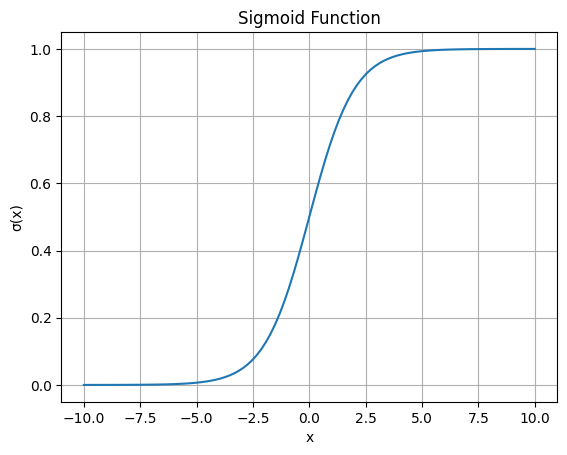

'\n그래프를 통해 확인할 수 있듯이,\n시그모이드 함수는 출력값을 0과 1 사이로 "제한"하여 확률로서 해석하도록 돕는다. (자연상수 e의 사용)\n자연상수 e는 지수 함수(exponential function)를 나타내며, 약 2.71828 값이다.\n입력 값 z가 매우 작을 경우(음의 무한대에 가까울 경우), 출력 값은 0에 가까워 진다.\n입력 값 z가 매우 클 경우(양의 무한대에 가까울 경우), 출력 값은 1에 가까워진다.\n입력 값 z가 0일 경우, 출력 값은 0.5가 된다. (0승은 무조건 1이니까)\n이 출력값 0.5를 기준으로 양성과 음성이 분류된다.\n\n주의) z값이 양성과 음성을 결정하는 것이 아니라, 시그모이드 함수를 계산한 출력 값이 결정하는 것이다.\n이진 분류 및 다중 분류 문제에서 확률을 예측하는 데 사용되며,\n인공신경망의 활성화 함수로 사용되어 비선형성을 도입하고 입력 값을 특정 범위로 제한하는 역할을 함\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x 값 범위 설정
x = np.linspace(-10, 10, 100)

# 시그모이드 함수 계산
y = 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.show()

'''
그래프를 통해 확인할 수 있듯이,
시그모이드 함수는 출력값을 0과 1 사이로 "제한"하여 확률로서 해석하도록 돕는다. (자연상수 e의 사용)
자연상수 e는 지수 함수(exponential function)를 나타내며, 약 2.71828 값이다.
입력 값 z가 매우 작을 경우(음의 무한대에 가까울 경우), 출력 값은 0에 가까워 진다.
입력 값 z가 매우 클 경우(양의 무한대에 가까울 경우), 출력 값은 1에 가까워진다.
입력 값 z가 0일 경우, 출력 값은 0.5가 된다. (0승은 무조건 1이니까)
이 출력값 0.5를 기준으로 양성과 음성이 분류된다.

주의) z값이 양성과 음성을 결정하는 것이 아니라, 시그모이드 함수를 계산한 출력 값이 결정하는 것이다.
이진 분류 및 다중 분류 문제에서 확률을 예측하는 데 사용되며,
인공신경망의 활성화 함수로 사용되어 비선형성을 도입하고 입력 값을 특정 범위로 제한하는 역할을 함
'''

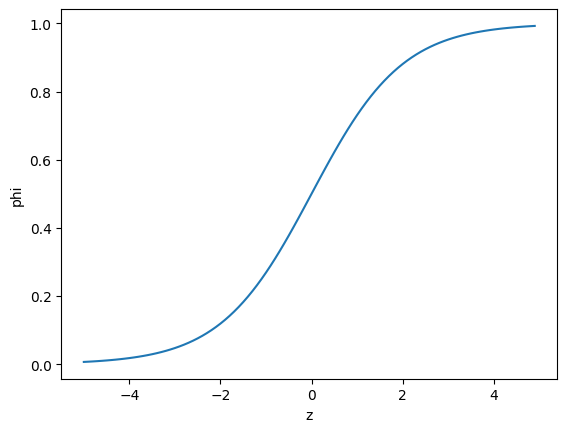

'\n사이킷런에 이미 로지스틱 회귀 모델인 LogisticRegression 클래스가 있음\n사이킷런은 시그모이드 함수의 출력 값이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단하는 것을\n이진 분류 수행을 통해 확인해 볼 예정\n'

In [ ]:
# 넘파이를 사용한 그래프 그리기
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

'''
사이킷런에 이미 로지스틱 회귀 모델인 LogisticRegression 클래스가 있음
사이킷런은 시그모이드 함수의 출력 값이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단하는 것을
이진 분류 수행을 통해 확인해 볼 예정
'''

In [ ]:
# 도미와 빙어 2개를 사용하여 이진 분류 수행
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

'''
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다.
이를 "불리언 인덱싱(boolean indexing)이라고 한다.
위의 코드에서 첫 번째와 세 번째 원소만 True에 전달됨
'''

['A' 'C']


'\n넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다.\n이를 "불리언 인덱싱(boolean indexing)이라고 한다.\n위의 코드에서 첫 번째와 세 번째 원소만 True에 전달됨\n'

In [ ]:
# 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 불리언 인덱싱 배열을 반환
train_bream_smelt = train_scaled[bream_smelt_indexes] # 위의 배열로 불리언 인덱싱 적용
target_bream_smelt = train_target[bream_smelt_indexes] # 위의 배열로 불리언 인덱싱 적용

'''
비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다.
예를 들어 도미인 행을 골라내려면, train_target == "Bream"과 같이 쓴다.
이 비교식은 trian_target 배열에서 "Bream"인 것은 True이고 그 외는 모두 False인 배열을 반환한다.
(== 연산자는 True 또는 False만 출력하기 때문)
도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어 행만 골라낼 수 있다.
왜 AND가 아닌 OR 연산자를 사용할까?
AND 연산자는 "동시에"를 의미하기 때문이다!
'''

'\n비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다.\n예를 들어 도미인 행을 골라내려면, train_target == "Bream"과 같이 쓴다.\n이 비교식은 trian_target 배열에서 "Bream"인 것은 True이고 그 외는 모두 False인 배열을 반환한다.\n(== 연산자는 True 또는 False만 출력하기 때문)\n도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어 행만 골라낼 수 있다.\n왜 AND가 아닌 OR 연산자를 사용할까?\nAND 연산자는 "동시에"를 의미하기 때문이다!\n'

In [ ]:
# 위의 데이터를 사용해 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression # 로지스틱 클래스는 sklearn.linear_model 패키지 아래 있음
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# train_bream_smelt에서 처음 5개 샘플의 예측 확률 확인
print(lr.predict_proba(train_bream_smelt[:5])) # 최근접 이웃 클래스와 마찬가지로 predict_proba() 메서드 사용 가능

# 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
# 도미와 빙어 중 어떤 것이 양성 클래스인지 정렬된 타깃값으로 확인
print(lr.classes_) # 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용함

'''
타깃값 확인 결과, 빙어(Smelt)가 양성 클래스이다.
배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높음
따라서 나머지는 모두 도미(Bream)로 예측할 것임
만약 도미(Bream)를 양성 클래스로 사용하려면 어떻게 해야 할까?
2장에서 했던 것처럼 Bream인 타깃값을 1로 만들고 나머지 타깃값은 0으로 만들어 사용
'''

['Bream' 'Smelt']


'\n타깃값 확인 결과, 빙어(Smelt)가 양성 클래스이다.\n배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높음\n따라서 나머지는 모두 도미(Bream)로 예측할 것임\n만약 도미(Bream)를 양성 클래스로 사용하려면 어떻게 해야 할까?\n2장에서 했던 것처럼 Bream인 타깃값을 1로 만들고 나머지 타깃값은 0으로 만들어 사용\n'

In [ ]:
# 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인
print(lr.coef_, lr.intercept_)

'''
로지스틱 회귀 모델이 학습한 방정식
z = -0.404*("Weight") - 0.576*("Length") - 0.663*('Diagonal") - 1.013*("Height") - 0.732*("Width") - 2.161
coef_ 속성은 계수(가중치), intercept_ 속성은 절편을 나타냄
'''

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


'\n로지스틱 회귀 모델이 학습한 방정식\nz = -0.404*("Weight") - 0.576*("Length") - 0.663*(\'Diagonal") - 1.013*("Height") - 0.732*("Width") - 2.161\ncoef_ 속성은 계수(가중치), intercept_ 속성은 절편을 나타냄\n'

In [ ]:
# 로지스틱 회귀 모델로 z 값 계산
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

'''
decision_function() 메서드로 z 값을 출력할 수 있음
이 z 값들을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
파이썬의 사이파이(scipy) 라이브러리에 시그모이드 함수가 있음
바로 expit()이다.
np.exp() 함수를 사용해 분수를 계산하는 것보다 훨씬 편리하고 안전하다.
'''

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


'\ndecision_function() 메서드로 z 값을 출력할 수 있음\n이 z 값들을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.\n파이썬의 사이파이(scipy) 라이브러리에 시그모이드 함수가 있음\n바로 expit()이다.\nnp.exp() 함수를 사용해 분수를 계산하는 것보다 훨씬 편리하고 안전하다.\n'

In [ ]:
# decisions 배열의 값을 확률로 변환
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
'''
출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다!
정리하자면,
decision_function() 메서드는 양성 클래스에 대한 z 값을 반환한다.
predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다.
coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어 있다.
지금까지의 이진 분류 수행 경험을 바탕으로 7개의 생선을 분류하는 다중 분류 문제로 넘어가 보자.
'''

'\n출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다!\n정리하자면,\ndecision_function() 메서드는 양성 클래스에 대한 z 값을 반환한다.\npredict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다.\ncoef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어 있다.\n지금가지의 이진 분류 수행 경험을 바탕으로 7개의 생선을 분류하는 다중 분류 문제로 넘어가 보자.\n'

In [ ]:
# 7개의 생선을 분류해 보면서 이진 분류와이 차이점 확인
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

'''
LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.
max_iter 매개변수의 반복 횟수 기본값은 100이다
충분한 훈련을 위해 반복 횟수를 1000으로 설정함
또한 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 "규제"한다.
이런 규제를 "L2 규제"라고 부른다.
릿지 회귀에서는 alpha 매개변수로 "규제의 양"을 조절했고, alpha가 커짐에 따라 규제도 커졌다.
LogisticRegression에서 규제를 제어하는 매개변수는 C(기본값 1)이다.
하지만 alpha와는 반대로 "작을수록 규제가 커진다."
여기에서는 규제를 조금 "완화"하기 위해 매개변수 C의 값을 20으로 늘림
점수 확인 결과, 과대적합이나 과소적합으로 치우친 것 같지 않아 보인다.
'''

0.9327731092436975
0.925


'\nLogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다.\nmax_iter 매개변수의 반복 횟수 기본값은 100이다\n충분한 훈련을 위해 반복 횟수를 1000으로 설정함\n또한 LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 "규제"한다.\n이런 규제를 "L2 규제"라고 부른다.\n릿지 회귀에서는 alpha 매개변수로 "규제의 양"을 조절했고, alpha가 커짐에 따라 규제도 커졌다.\nLogisticRegression에서 규제를 제어하는 매개변수는 C(기본값 1)이다.\n하지만 alpha와는 반대로 "작을수록 규제가 커진다."\n여기에서는 규제를 조금 "완화"하기 위해 매개변수 C의 값을 20으로 늘림\n점수 확인 결과, 과대적합이나 과소적합으로 치우친 것 같지 않아 보인다.\n'

In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확인
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 테스트 샘플의 처음 5개 샘플에 대한 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 소수점 네 번째 자리에서 반올림

'''
5개 샘플(특성)에 대한 예측이므로 5개의 행이 출력되었으며,
총 7개 생선에 대한 확률 계산이므로 7개의 열이 출력되었음 (데이터프레임에서 넘파이 배열로 변환되었기 때문)
이진 분류일 경우 2개의 열만 있었다!

첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높음(84.1%)
'''

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


'\n5개 샘플(특성)에 대한 예측이므로 5개의 행이 출력되었으며,\n총 7개 생선에 대한 확률 계산이므로 7개의 열이 출력되었음 (데이터프레임에서 넘파이 배열로 변환되었기 때문)\n이진 분류일 경우 2개의 열만 있었다!\n\n첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높음(84.1%)\n'

In [ ]:
# 세 번째 열 확률의 클래스 확인
print(lr.classes_)

'''
첫 번째 샘플은 농어(Perch)를 가장 높은 확률로 예측,
두 번째 샘플은 여섯 번째 열인 빙어(Smelt)를 가장 높은 확률(94.6%)로 예측함
이진 분류는 샘플마다 2개의 확률을 출력하고,
다중 분류는 샘플마다 클래스 개수만큼 확률을 출력함!
그럼 다중 분류일 경우 선형 방정식은 어떤 모습일까?
'''

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


'\n첫 번째 샘플은 농어(Perch)를 가장 높은 확률로 예측,\n두 번째 샘플은 여섯 번째 열인 빙어(Smelt)를 가장 높은 확률(94.6%)로 예측함\n이진 분류는 샘플마다 2개의 확률을 출력하고,\n다중 분류는 샘플마다 클래스 개수만큼 확률을 출력함!\n그럼 다중 분류일 경우 선형 방정식은 어떤 모습일까?\n'

In [ ]:
# 계수와 절편 크기 확인
print(lr.coef_.shape, lr.intercept_.shape)

'''
(7, 5)는 7개의 행과 5개의 열을 가진 2차원 배열을 의미함
(7, )는 7개의 요소를 가진 1차원 배열을 의미함
즉 이것은 이진 분류에서 보았던 z를 7개나 계산한다는 의미이다!
다중 분류는 클래스마다 z값을 하나씩 계산한다.
이중 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
그렇다면 확률은 어떻게 계산할까?
이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했다.
다중 분류는 이와 달리 "소프트맥스(softmax) 함수"를 사용하여 7개의 z값을 확률로 변환한다.
소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다.
이를 위해 지수 함수를 사용하기 때문에 "정규화된 지수 함수"라고 부른다.
계산 방정식: e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
그 다음 e^zn들을 각각 e_sum으로 나눈다.
s1 = e^z1 / e_sum, ... ` s7 = e^z7 / e_sum

시그모이드 함수와 소프트맥스 함수를 왜 강조할까?
나중에 등장할 신경망을 배울 때 훨씬 수월한 이해를 돕기 때문이다.
'''

(7, 5) (7,)


'\n(7, 5)는 7개의 행과 5개의 열을 가진 2차원 배열을 의미함\n(7, )는 7개의 요소를 가진 1차원 배열을 의미함\n즉 이것은 이진 분류에서 보았던 z를 7개나 계산한다는 의미이다!\n다중 분류는 클래스마다 z값을 하나씩 계산한다.\n이중 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.\n그렇다면 확률은 어떻게 계산할까?\n이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환했다.\n다중 분류는 이와 달리 "소프트맥스(softmax) 함수"를 사용하여 7개의 z값을 확률로 변환한다.\n소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든다.\n이를 위해 지수 함수를 사용하기 때문에 "정규화된 지수 함수"라고 부른다.\n계산 방정식: e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7\n그 다음 e^zn들을 각각 e_sum으로 나눈다.\ns1 = e^z1 / e_sum, ... ` s7 = e^z7 / e_sum\n\n시그모이드 함수와 소프트맥스 함수를 왜 강조할까?\n나중에 등장할 신경망을 배울 때 훨씬 수월한 이해를 돕기 때문이다.\n'

In [ ]:
'''
이진 분류에서처럼 decision_function() 메서드로 z1~z7까지의 값을 구한 다음
소프트맥스 함수를 사용해 확률로 바꿀 예정이다.
'''

# 먼저 테스트 세트의 처음 5개 샘플에 대한 z1~z7의 값 계산
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [ ]:
# decision 배열을 소프트맥스 함수에 전달
from scipy.special import softmax
proba = softmax(decision, axis=1) # axis 매개변수는 소프트맥스를 계산할 축을 지정하여 각 행(샘플)에 대해 소프트맥스 계산
print(np.round(proba, decimals=3))

# 높은 확률은 예측에 대한 강도 즉 신뢰성이 높다는 것을 의미한다!

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
